In [1]:
from pathlib import Path
from zipfile import ZipFile
import requests

URL="https://www.kaggle.com/api/v1/datasets/download/yasserh/titanic-dataset"
TITANIC_ZIP = "titanic.zip"
titanic_path = Path(TITANIC_ZIP)
if not titanic_path.exists():
    data = requests.get(URL)
    with open(TITANIC_ZIP,"wb") as f:
        f.write(data.content)
    with open(TITANIC_ZIP, 'rb') as f:
        ZipFile(f).extractall()
    print('Bestand is gedownload en uitgepakt')
else:
    print('Bestand bestaat al')




Bestand bestaat al


## Lees de data

In [1]:
import pandas as pd
TITANIC_CSV = "Titanic-Dataset.csv"
df = pd.read_csv(TITANIC_CSV)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Filter de kolommen
We zijn alleen geïnteresseerd in Survived, Sex, Pclass en Age

In [2]:
df = df[['Survived', 'Sex', 'Pclass', 'Age']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Pclass    891 non-null    int64  
 3   Age       714 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


## Sex is een category

In [3]:
df['Sex'] = df.Sex.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Sex       891 non-null    category
 2   Pclass    891 non-null    int64   
 3   Age       714 non-null    float64 
dtypes: category(1), float64(1), int64(2)
memory usage: 22.0 KB


## Survived is een boolean

In [4]:
df['Survived'] = df.Survived.astype(pd.BooleanDtype())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    boolean 
 1   Sex       891 non-null    category
 2   Pclass    891 non-null    int64   
 3   Age       714 non-null    float64 
dtypes: boolean(1), category(1), float64(1), int64(1)
memory usage: 16.8 KB


## Alleen bekende leeftijden overhouden


In [6]:
df = df.dropna()
df.info()

<class 'pandas.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  714 non-null    boolean 
 1   Sex       714 non-null    category
 2   Pclass    714 non-null    int64   
 3   Age       714 non-null    float64 
dtypes: boolean(1), category(1), float64(1), int64(1)
memory usage: 18.8 KB


## Bereken de aantallen overlevenden/niet-overlevenden per klasse

In [5]:
per_Pclass = df.groupby(['Pclass', 'Survived']).size().unstack() #zet Pclass als index
per_Pclass

Survived,False,True
Pclass,,
1,80,136
2,97,87
3,372,119


## Bereken de percentages

In [6]:
percentages = per_Pclass.div(per_Pclass.sum(axis=1), axis=0) * 100
percentages

Survived,False,True
Pclass,,
1,37.037037,62.962963
2,52.717391,47.282609
3,75.763747,24.236253


## Plot de overlevingskans per klasse

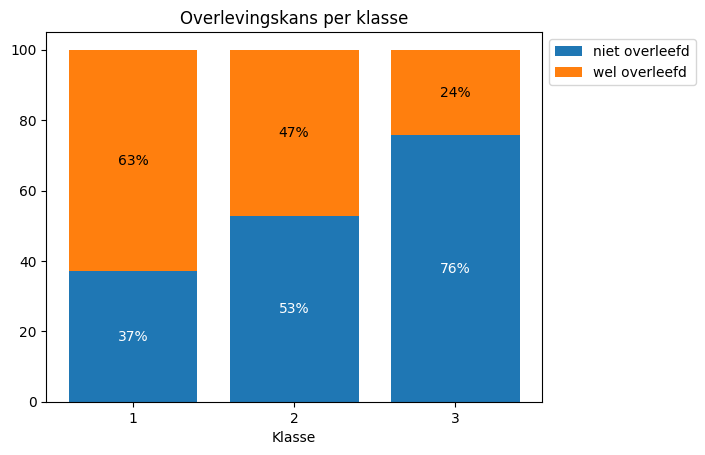

In [7]:
import matplotlib.pyplot as plt

bar = plt.bar(percentages.index, percentages.iloc[:, 0], label='niet overleefd')
plt.gca().bar_label(bar, fmt='{:,.0f}%', label_type='center', color='white')
bar = plt.bar(percentages.index, percentages.iloc[:, 1], bottom=percentages.iloc[:, 0], label='wel overleefd')
plt.gca().bar_label(bar, fmt='{:,.0f}%', label_type='center')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Klasse')
plt.title('Overlevingskans per klasse')
plt.xticks(per_Pclass.index)
plt.show()

# Verdeling leeftijd-overleefd per klasse en per geslacht
Maak de onderstaande grafiek. Je mag de hulp inroepen van ChatGPT. Maar beschrijf zelf in markdown cellen wat elke stap doet (vraag geen bijkomende uitleg aan ChatGPT). Dat wil zeggen dat je de documentatie zult moeten opzoeken voor elke functie die ChatGPT gebruikt en die je niet kent. 

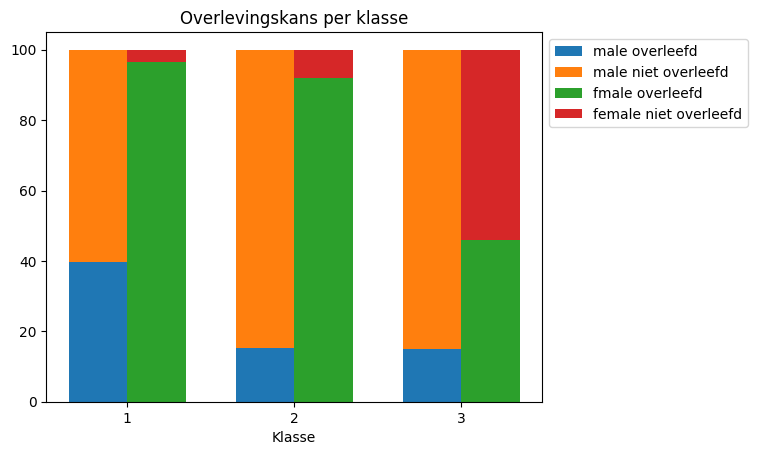

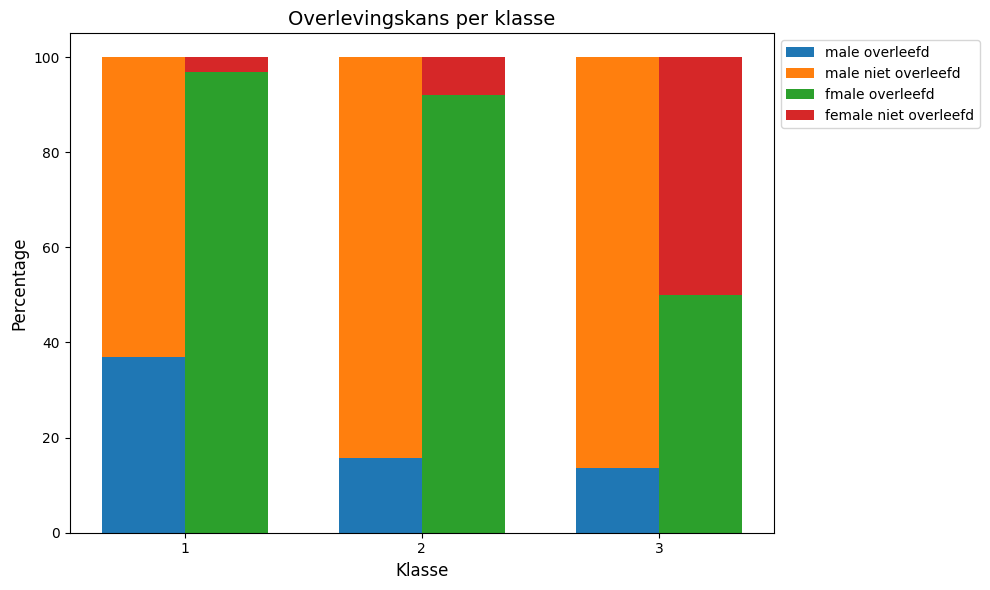

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Laad de Titanic dataset
df = pd.read_csv('Titanic-Dataset.csv')

# Bereid de data voor - bereken percentages per klasse en geslacht
male_survived = []
male_not_survived = []
female_survived = []
female_not_survived = []

classes = [1, 2, 3]

for pclass in classes:
    # Mannen
    male_data = df[(df['Pclass'] == pclass) & (df['Sex'] == 'male')]
    male_total = len(male_data)
          # bereken percentage mannen overleefd per klassen
    male_survived_pct = (male_data[male_data['Survived'] == 1].shape[0] / male_total) * 100
        # bereken percentage mannen gestorven per klassen
    male_not_survived_pct = (male_data[male_data['Survived'] == 0].shape[0] / male_total) * 100
    
    # voeg toe aan lijst voor elke klassen
    male_survived.append(male_survived_pct)
    male_not_survived.append(male_not_survived_pct)
    
    # Vrouwen
    female_data = df[(df['Pclass'] == pclass) & (df['Sex'] == 'female')]
    female_total = len(female_data)
    # bereken percentage vrouwen overleefd per klassen
    female_survived_pct = (female_data[female_data['Survived'] == 1].shape[0] / female_total) * 100
    # bereken percentage vrouwen gestorven per klassen
    female_not_survived_pct = (female_data[female_data['Survived'] == 0].shape[0] / female_total) * 100

    # Voeg toe aan lijst voor elke klassen 
    female_survived.append(female_survived_pct)
    female_not_survived.append(female_not_survived_pct)

# Maak de grafiek
fig, ax = plt.subplots(figsize=(10, 6))

# X-as instellen op de 3 klasses 
x = np.arange(len(classes))
width = 0.35

# Mannen stacked bar (links)
ax.bar(x - width/2, male_survived, width, label='male overleefd', color='#1f77b4')
ax.bar(x - width/2, male_not_survived, width, bottom=male_survived, 
       label='male niet overleefd', color='#ff7f0e')

# Vrouwen stacked bar (rechts)
ax.bar(x + width/2, female_survived, width, label='fmale overleefd', color='#2ca02c')
ax.bar(x + width/2, female_not_survived, width, bottom=female_survived, 
       label='female niet overleefd', color='#d62728')

# Layout
ax.set_xlabel('Klasse', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)
ax.set_title('Overlevingskans per klasse', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set_ylim(0, 105)

plt.tight_layout()
plt.show()